In [1]:
 #part(a)
import matplotlib.pyplot as plt
import numpy as np
import math

#Parameters
n = 10
p = 0.5
numtrials = 100


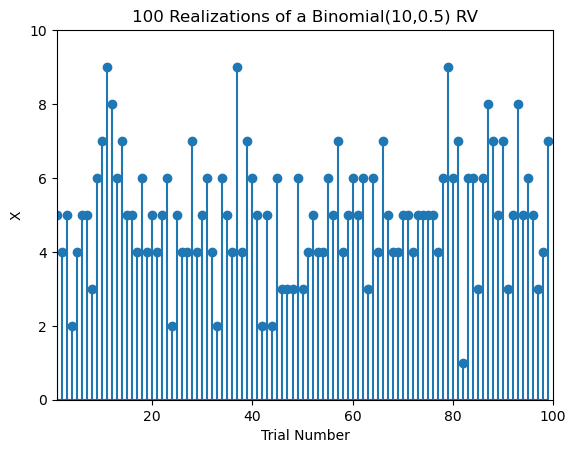

In [2]:
#Generate Binomial(n,p) random variables
X = np.random.binomial(n,p,numtrials)
#Plot
fig = plt.figure()
plt.stem(X)
plt.axis([1, numtrials, 0, n])
plt.xlabel('Trial Number')
plt.ylabel('X')
#plt.title(str(numtrials) + " Realizations of a Binomial("
#            + str(n) + "," + str(p) + ") RV")
plt.title(f"{numtrials} Realizations of a Binomial({n},{p}) RV")
plt.show()
fig.savefig('hw3apython.png')

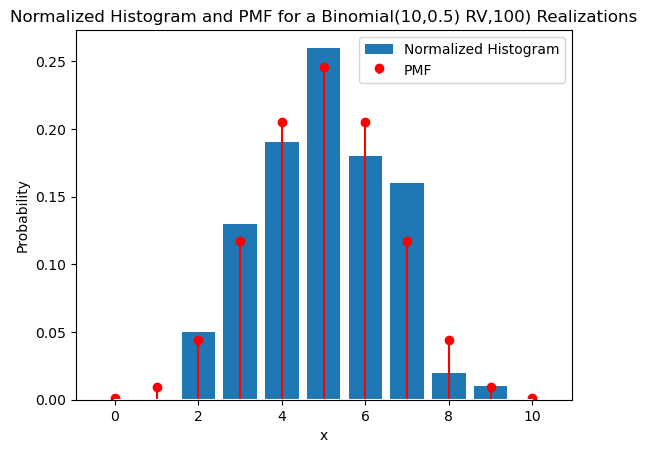

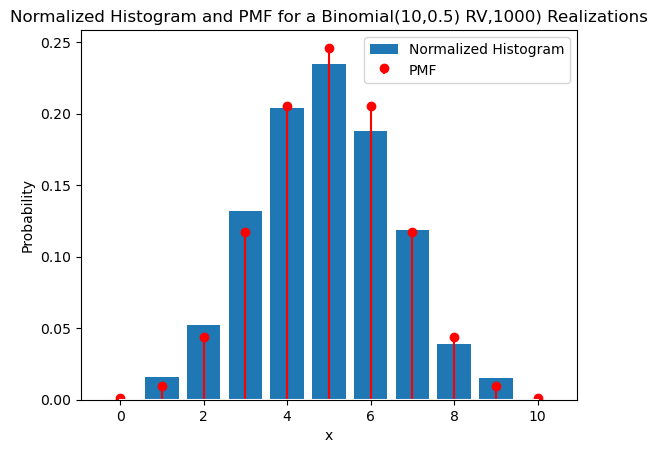

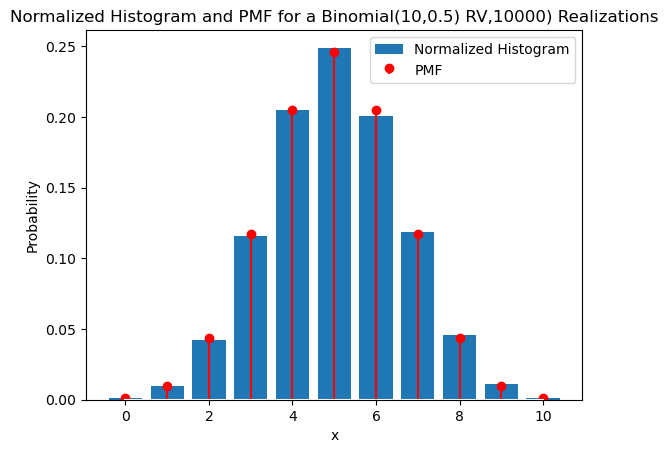

In [3]:
#part(b)
#Parameters
n = 10
p = 0.5
trials = [100,1000,10000]
for numtrials in trials:
    #Generate Binomial(n,p) random variables
    X = np.random.binomial(n,p,numtrials)
    #Initialize arrays
    counts = np.zeros(n+1)
    pmf = np.zeros(n+1)
    #Count number of times each value occurs
    for k in range(0,n+1):
        #Your code to populate the array counts so that counts[k] equals
        #the number of times the value k occurs in X[0],...,X[numtrials-1]
        for i in range(0,numtrials):
            if (X[i] == k):
                counts[k] = counts[k] + 1
        
    #Divide counts by number of trials to get a normalized histogram
    normhist = counts/numtrials
    #Calculate probability mass function
    for k in range(0,n+1):
        nchoosek = math.factorial(n)/(math.factorial(k)*math.factorial(n-k))
        pmf[k] = nchoosek * p**k * (1-p)**(n-k)
    #Plot
    xvals = np.arange(len(counts)) #Array of possible values

    fig = plt.figure()
    plt.bar(xvals,normhist)
    plt.xlabel('x')
    plt.ylabel('Probability')
    plt.stem(xvals,pmf,linefmt='r',markerfmt='ro',basefmt='w')
    plt.title(f"Normalized Histogram and PMF for a Binomial({n},{p}) RV,{numtrials}) Realizations")
    plt.legend(['Normalized Histogram','PMF'])
    plt.show()
    fig.savefig("hw3bpython_"+str(numtrials)+"trials.png",bbox_inches='tight')


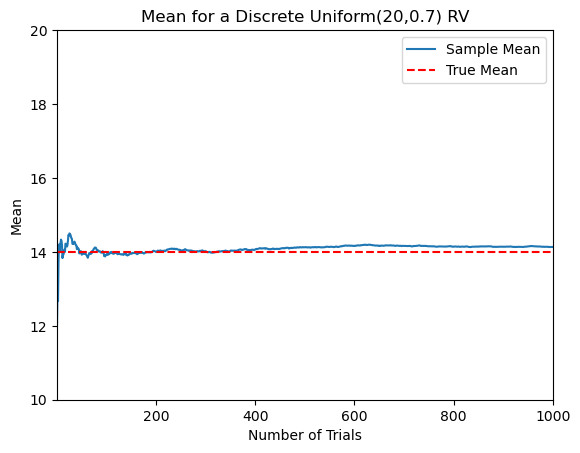

In [4]:
#Parameters
n = 20;
p = 0.7;
numtrials = 1000;

#Generate random samples

X = np.random.binomial(n,p,numtrials)


#Determine sample means
samplemeanX = np.zeros(numtrials)
for m in range(0,numtrials):
   #Your code to calculate the average of X[0],...,X[m]
    samplemeanX[m] = sum(X[0:m+1])/(m+1)

#Calculate true mean
truemeanX = n*p
    
#Plot
fig = plt.figure()
plt.plot(np.arange(1,numtrials+1),samplemeanX)
plt.plot(np.arange(1,numtrials+1),truemeanX*np.ones(numtrials),'r--')
plt.axis([1, numtrials, 10, 20])
plt.xlabel('Number of Trials')
plt.ylabel('Mean')
plt.legend(['Sample Mean','True Mean'])
plt.title(f"Mean for a Discrete Uniform({n},{p}) RV")
plt.show()
fig.savefig('hw3_s23_cpython.png')

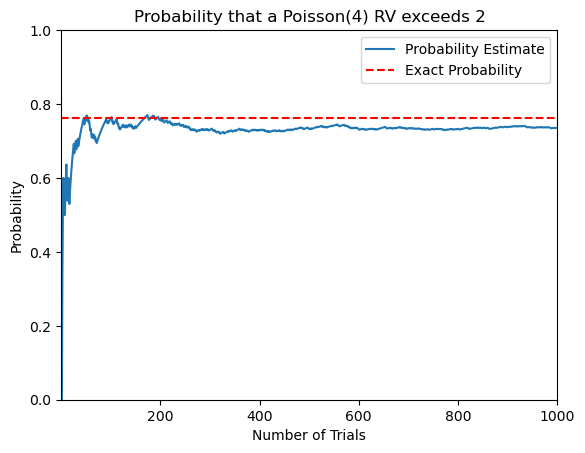

In [5]:
#Parameters
alpha = 4
b = 2
numtrials = 1000

#Generate Poisson(alpha) random variables
X = np.random.poisson(alpha,numtrials)

#Determine probability estimate
probestimate = np.zeros(numtrials)
for m in range(0,numtrials):
    #%Your code for (number of times X[0],...,X[m] exceeds b)/(m+1)
    probestimate[m] = float(sum(X[0:m+1] > b))/(m+1)
    
#Determine exact probability (using complement)
complementprob = 0
for i in range(0,b+1):
    complementprob = complementprob + float(alpha**i)/(math.factorial(i))\
                     * np.exp(-alpha)
exactprob = 1 - complementprob
    
#Plot
fig = plt.figure()
plt.plot(np.arange(1,numtrials+1),probestimate)
plt.plot(np.arange(1,numtrials+1),exactprob*np.ones(numtrials),'r--')
plt.axis([1, numtrials, 0, 1])
plt.xlabel('Number of Trials')
plt.ylabel('Probability')
plt.legend(['Probability Estimate','Exact Probability'])
plt.title(f"Probability that a Poisson({alpha}) RV exceeds {b}")
plt.show()
fig.savefig('hw3d_s23_python.png')